In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage import io

In [10]:
# Load picture and detect edges
image = io.imread("images/1_1.jpg", 0)
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)

ValueError: The parameter `image` must be a 2-dimensional array

In [4]:
# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

In [5]:
# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=3)

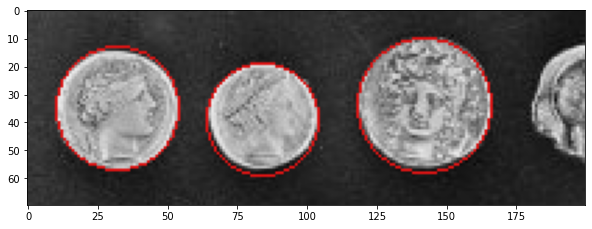

In [6]:
# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius, shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()